In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.shape

(18249, 14)

There are 18249 rows and 14 columns

There is an Unnamed: 0 column which we will have to remove 4046, 4225 and 4770 are Product look up code as per the description given. We will then rename them as PL1, PL2 and PL3

In [9]:
df['PL1']=df['4046']
df['PL2']=df['4225']
df['PL3']=df['4770']

In [10]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,PL1,PL2,PL3
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,2.930084e+05,2.951546e+05,2.283974e+04
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,1.264989e+06,1.204120e+06,1.074641e+05
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,8.540700e+02,3.008780e+03,0.000000e+00
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,8.645300e+03,2.906102e+04,1.849900e+02
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,1.110202e+05,1.502069e+05,6.243420e+03
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,2.274362e+07,2.047057e+07,2.546439e+06


In [11]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1036.74,54454.85,48.16
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,674.28,44638.81,58.33
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,794.70,109149.67,130.50
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1132.00,71976.41,72.58
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,941.48,43838.39,75.78


The columns are copied now lets drop the original

In [12]:
df.drop(['Unnamed: 0','4046','4225','4770'],axis=1,inplace=True)

In [13]:
df

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1036.74,54454.85,48.16
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,674.28,44638.81,58.33
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,794.70,109149.67,130.50
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1132.00,71976.41,72.58
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,941.48,43838.39,75.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2046.96,1529.20,0.00
18245,2018-01-28,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1191.70,3431.50,0.00
18246,2018-01-21,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1191.92,2452.79,727.94
18247,2018-01-14,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1527.63,2981.04,727.01


In [14]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
PL1             17702
PL2             18103
PL3             12071
dtype: int64

In [15]:
df.describe()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,PL1,PL2,PL3
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04
mean,1.405978,8.506440e+05,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,2.930084e+05,2.951546e+05,2.283974e+04
std,0.402677,3.453545e+06,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,1.264989e+06,1.204120e+06,1.074641e+05
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000,1.083858e+04,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,8.540700e+02,3.008780e+03,0.000000e+00
50%,1.370000,1.073768e+05,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,8.645300e+03,2.906102e+04,1.849900e+02
75%,1.660000,4.329623e+05,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,1.110202e+05,1.502069e+05,6.243420e+03
max,3.250000,6.250565e+07,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,2.274362e+07,2.047057e+07,2.546439e+06


Because of the float data we are not getting the correct pciture of the statstical summary.

We will need to check this after removing the error

In [16]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,PL1,PL2,PL3
count,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000,18249.00000
mean,1.40598,850644.01301,239639.20206,182194.68670,54338.08814,3106.42651,2016.14790,293008.42453,295154.56836,22839.73599
std,0.40268,3453545.35540,986242.39922,746178.51496,243965.96455,17692.89465,0.93994,1264989.08176,1204120.40114,107464.06844
min,0.44000,84.56000,0.00000,0.00000,0.00000,0.00000,2015.00000,0.00000,0.00000,0.00000
25%,1.10000,10838.58000,5088.64000,2849.42000,127.47000,0.00000,2015.00000,854.07000,3008.78000,0.00000
50%,1.37000,107376.76000,39743.83000,26362.82000,2647.71000,0.00000,2016.00000,8645.30000,29061.02000,184.99000
75%,1.66000,432962.29000,110783.37000,83337.67000,22029.25000,132.50000,2017.00000,111020.20000,150206.86000,6243.42000
max,3.25000,62505646.52000,19373134.37000,13384586.80000,5719096.61000,551693.65000,2018.00000,22743616.17000,20470572.61000,2546439.11000


As per above observation:

Mean is higher than median. Hence skewness is present and it is right skewed. Standard deviation is very high in some of the columns and even big difference in 75 percentile and Max, indicating the presence of outliers. Min of 0 in XLarge bags.

In [17]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [18]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

We have data only for 4 years 2015,2016,2017 & 2018

In [19]:
df.Date = df.Date.apply(pd.to_datetime)
df['Month'] = df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [20]:
df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3,Month
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1036.74,54454.85,48.16,DEC
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,674.28,44638.81,58.33,DEC
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,794.70,109149.67,130.50,DEC
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1132.00,71976.41,72.58,DEC
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,941.48,43838.39,75.78,NOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2046.96,1529.20,0.00,FEB
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1191.70,3431.50,0.00,JAN
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1191.92,2452.79,727.94,JAN
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1527.63,2981.04,727.01,JAN


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

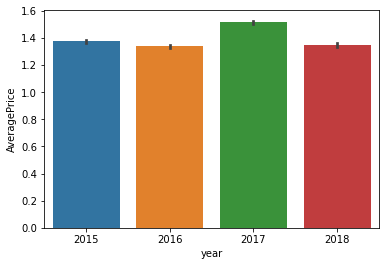

In [21]:
sns.barplot(x='year',y='AveragePrice',data=df)

Prices were highest in 2017

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

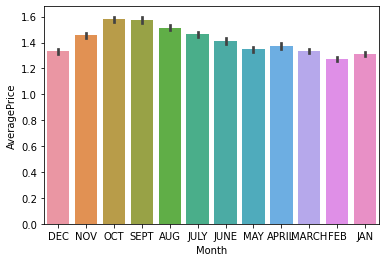

In [22]:
sns.barplot(x='Month',y='AveragePrice',data=df)

Average price remains almost the same.

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

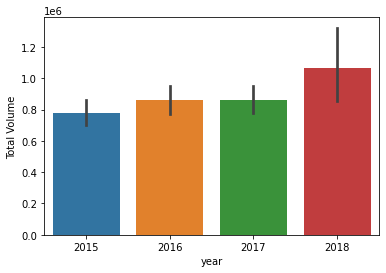

In [23]:
sns.barplot(x='year',y='Total Volume',data=df)

Volume is increasing as the years graduate.

<AxesSubplot:xlabel='Month', ylabel='Total Volume'>

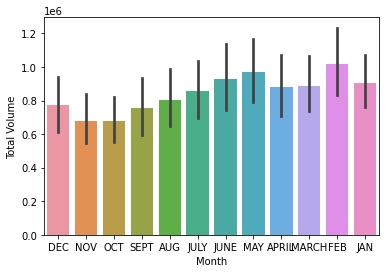

In [24]:
sns.barplot(x='Month',y='Total Volume',data=df)

Volume is high in FEB, May and June. Low Oct, Nov has low volume of sale

<AxesSubplot:xlabel='Month,year'>

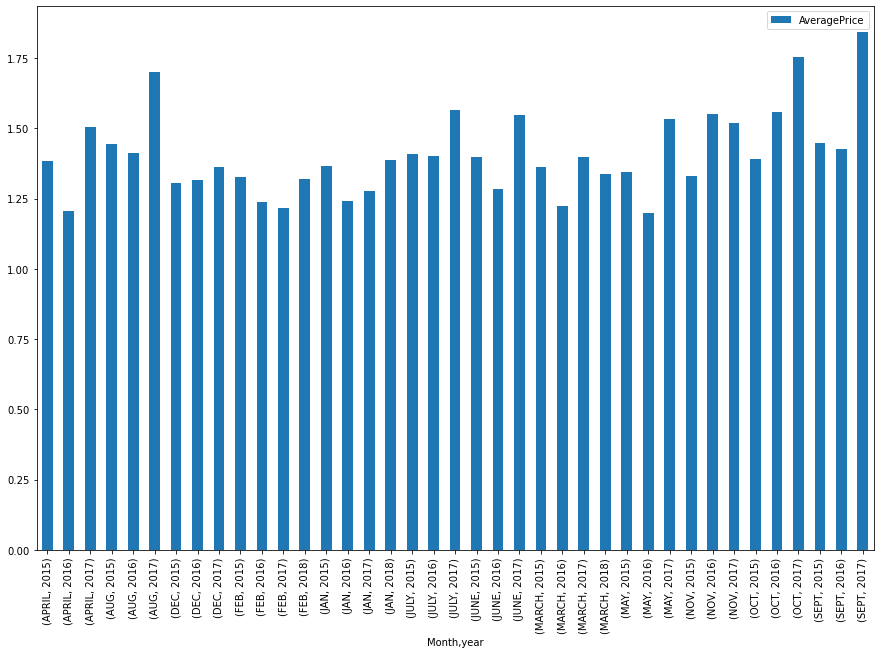

In [25]:
df.groupby(['Month','year']).agg({'AveragePrice':np.mean}).plot.bar(figsize=(15, 10))

Price was highest in Sept 2017 and least in May 2016

<AxesSubplot:xlabel='year', ylabel='PL1'>

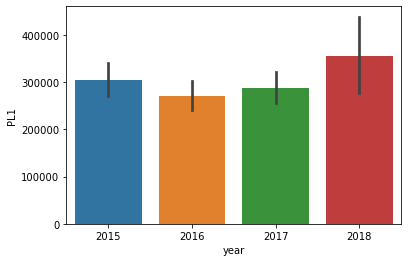

In [26]:
sns.barplot(y='PL1',x='year',data=df)

Product label 1 has increased from 2015

<AxesSubplot:xlabel='year', ylabel='PL2'>

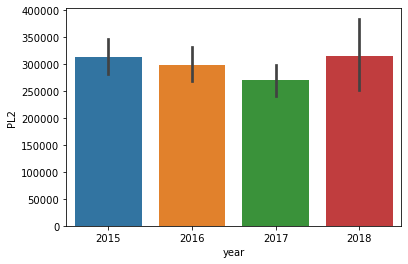

In [27]:
sns.barplot(y='PL2',x='year',data=df)

Product label 2 has decreased from 2015 and increased in 2018

<AxesSubplot:xlabel='year', ylabel='PL3'>

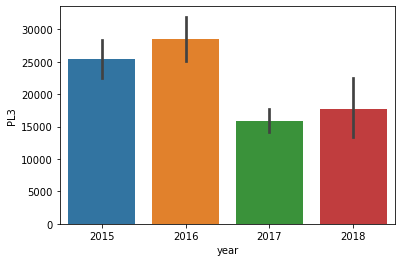

In [28]:
sns.barplot(y='PL3',x='year',data=df)

Product label 3 has seen increase from 2015 to 2016 & decreased in 2017 & slight increase in 2018

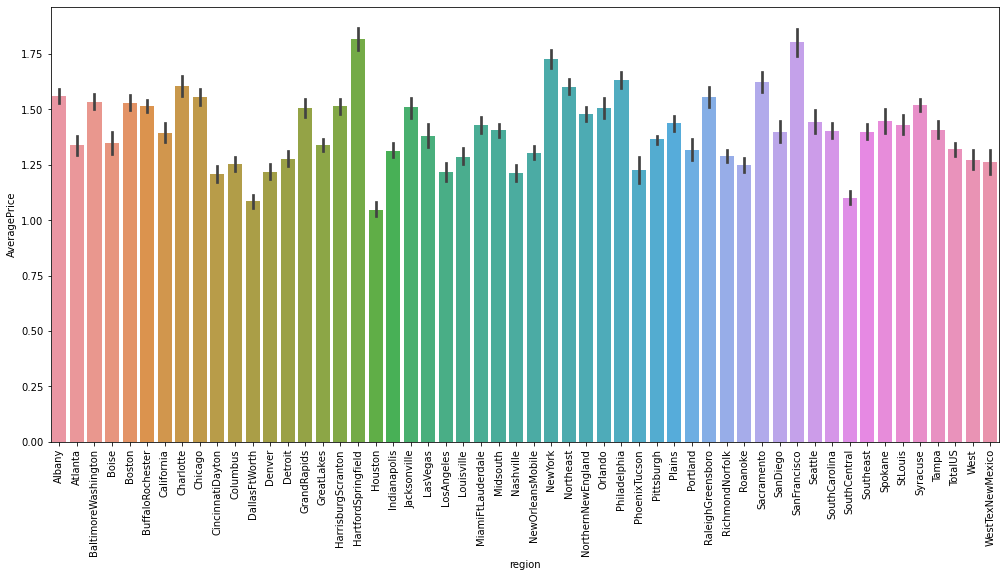

In [29]:
plt.figure(figsize=(17,8))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.show()

Average Price is higher is SanFrancisco followed by HartfordSpringfield, NewYork, Average price is very low in Houston

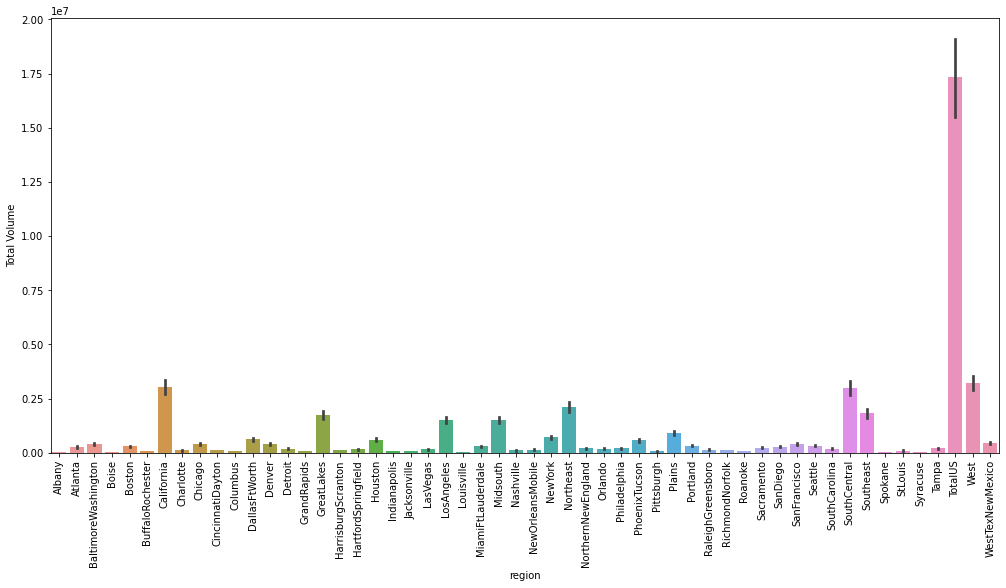

In [30]:
plt.figure(figsize=(17,8))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='region,year'>

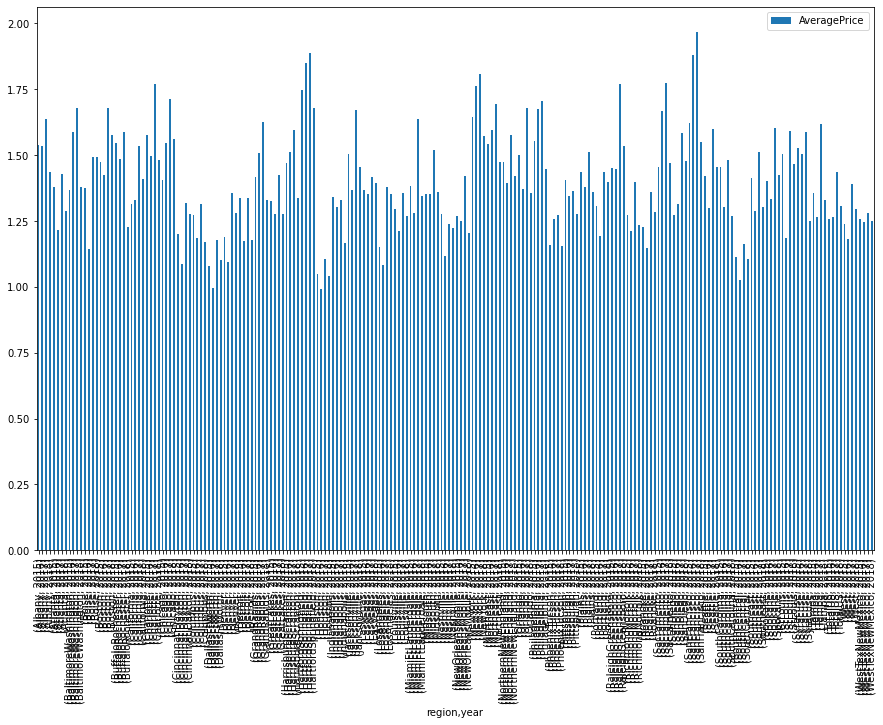

In [31]:
df.groupby(['region','year']).agg({'AveragePrice':np.mean}).plot.bar(figsize=(15, 10))

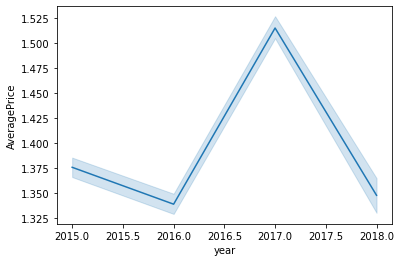

In [32]:
sns.lineplot(x="year", y="AveragePrice", data=df)
plt.show()

We see Significant rise in 2017 and then decline

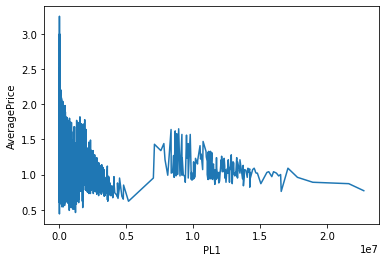

In [33]:
sns.lineplot(x="PL1", y="AveragePrice", data=df)
plt.show()

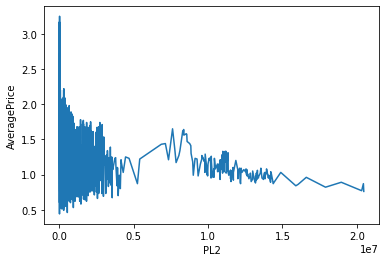

In [34]:
sns.lineplot(x="PL2", y="AveragePrice", data=df)
plt.show()

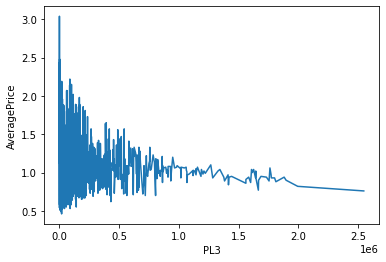

In [35]:
sns.lineplot(x="PL3", y="AveragePrice", data=df)
plt.show()

Above line plots confirm that PL1,PL2,PL3 price has decrease. We also observe that volume has increased, hence the decrease in Avg price

In [36]:
df.corr()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,PL1,PL2,PL3
AveragePrice,1.000000,-0.192752,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.208317,-0.172928,-0.179446
Total Volume,-0.192752,1.000000,0.963047,0.967238,0.880640,0.747157,0.017193,0.977863,0.974181,0.872202
Total Bags,-0.177088,0.963047,1.000000,0.994335,0.943009,0.804233,0.071552,0.920057,0.905787,0.792314
Small Bags,-0.174730,0.967238,0.994335,1.000000,0.902589,0.806845,0.063915,0.925280,0.916031,0.802733
Large Bags,-0.172940,0.880640,0.943009,0.902589,1.000000,0.710858,0.087891,0.838645,0.810015,0.698471
XLarge Bags,-0.117592,0.747157,0.804233,0.806845,0.710858,1.000000,0.081033,0.699377,0.688809,0.679861
year,0.093197,0.017193,0.071552,0.063915,0.087891,0.081033,1.000000,0.003353,-0.009559,-0.036531
PL1,-0.208317,0.977863,0.920057,0.925280,0.838645,0.699377,0.003353,1.000000,0.926110,0.833389
PL2,-0.172928,0.974181,0.905787,0.916031,0.810015,0.688809,-0.009559,0.926110,1.000000,0.887855
PL3,-0.179446,0.872202,0.792314,0.802733,0.698471,0.679861,-0.036531,0.833389,0.887855,1.000000


<AxesSubplot:>

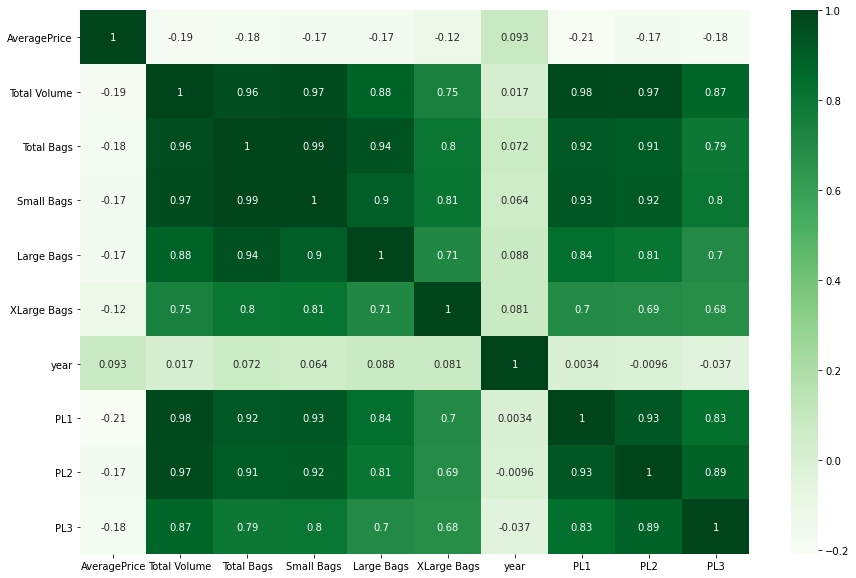

In [37]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

We can see that Total Volume is highly co related with almost all the features. Total Bags, Small Bags and Large Bags are high corelated among themselves as well as with Total Volume.

In [38]:
columns=['AveragePrice','Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags','PL1','PL2','PL3']

In [39]:
df.drop(['type'],axis=1,inplace=True)

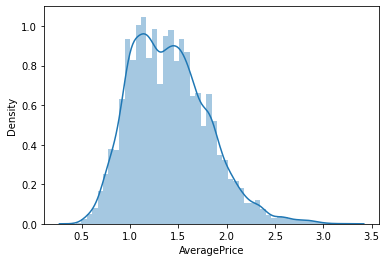

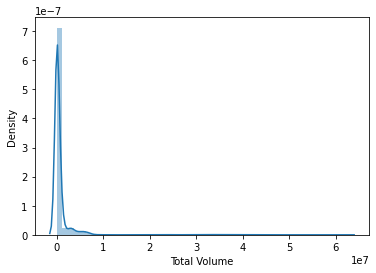

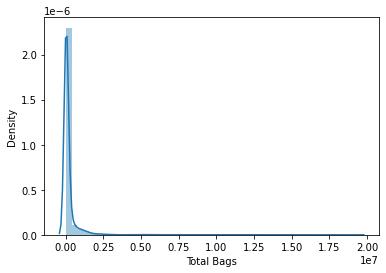

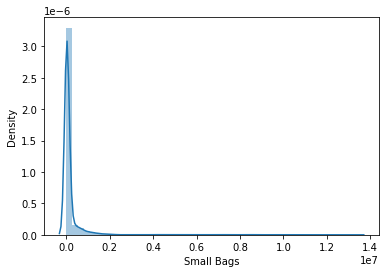

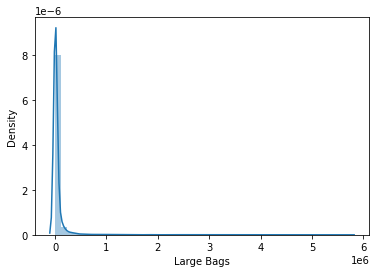

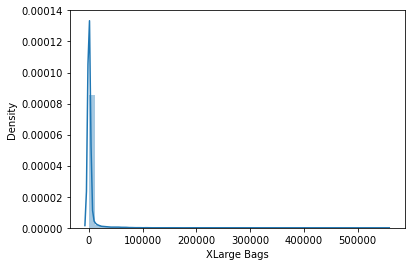

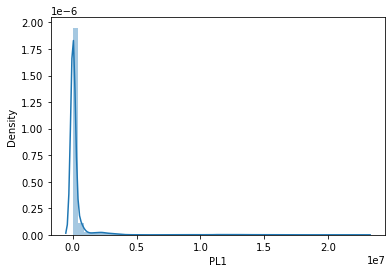

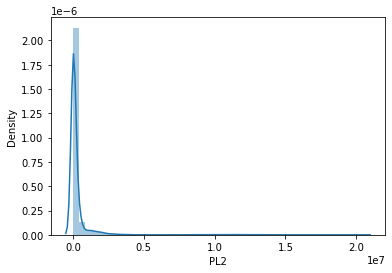

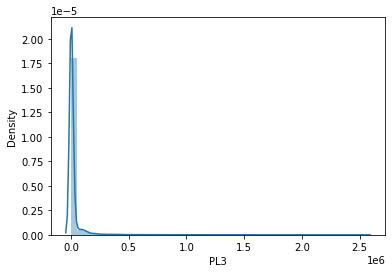

In [40]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

Most of the features are left skewed indicating the presence of outliers.

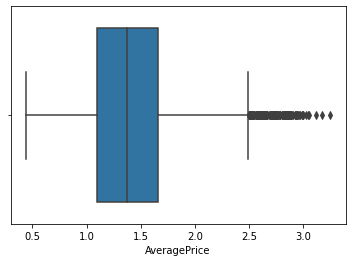

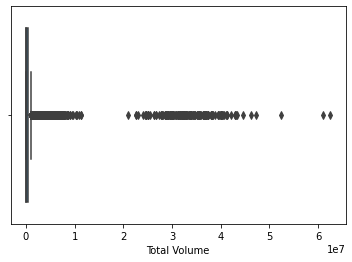

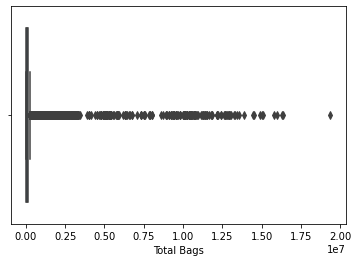

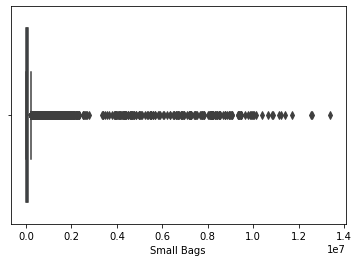

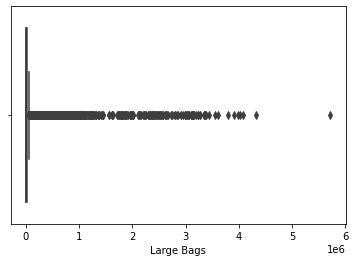

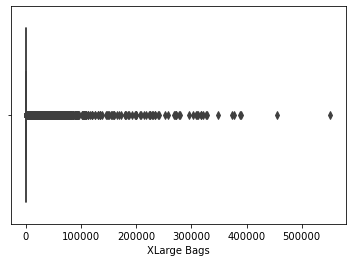

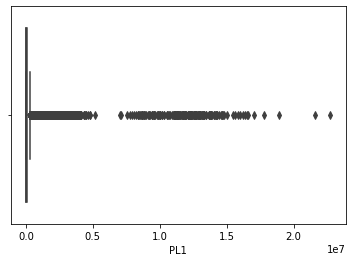

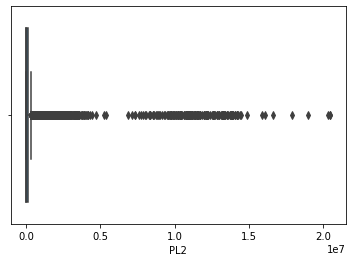

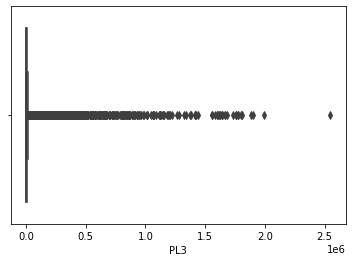

In [41]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

There are many outliers present in the dataset. Need to remove the outliers

We will have to convert the categorical feature into numerical using Label encoder.

In [42]:
columns_cat=['year','Month','region']

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
for i in range(len(columns_cat)):
    df[columns_cat[i]]=le.fit_transform(df[columns_cat[i]])

In [45]:
df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,0,1036.74,54454.85,48.16,2
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,0,674.28,44638.81,58.33,2
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,0,794.70,109149.67,130.50,2
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,0,1132.00,71976.41,72.58,2
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,0,941.48,43838.39,75.78,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,13066.82,431.85,0.0,3,53,2046.96,1529.20,0.00,3
18245,1.71,13888.04,9264.84,8940.04,324.80,0.0,3,53,1191.70,3431.50,0.00,4
18246,1.87,13766.76,9394.11,9351.80,42.31,0.0,3,53,1191.92,2452.79,727.94,4
18247,1.93,16205.22,10969.54,10919.54,50.00,0.0,3,53,1527.63,2981.04,727.01,4


# Removing Outlier

In [46]:
from scipy.stats import zscore
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([8, 8, 5, ..., 0, 0, 0], dtype=int64))


In [47]:
print('shape before removing the outliers:', df.shape)

dfnew=df[(zscr<3).all(axis=1)]

print('shape after removing the outliers:', dfnew.shape)

shape before removing the outliers: (18249, 12)
shape after removing the outliers: (17651, 12)


In [48]:
100-((18249-17651)/18249)*100

96.72310811551318

We are losing around 3.28% data after removing the outliers.

In [49]:
df=dfnew

In [50]:
for i in columns:
    if df[i].skew()>0.50:
        df[i]=np.log1p(df[i])

In [51]:
df.skew()

AveragePrice    0.377432
Total Volume   -0.049950
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
year            0.229976
region          0.012798
PL1            -0.420273
PL2            -0.604619
PL3             0.068532
Month           0.029197
dtype: float64

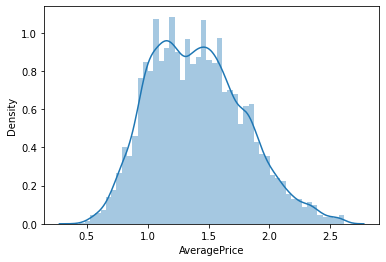

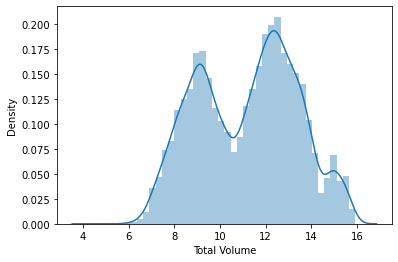

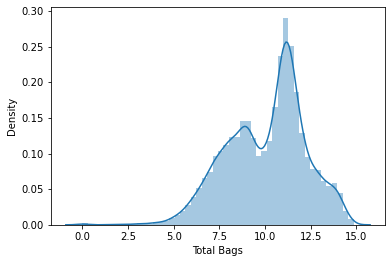

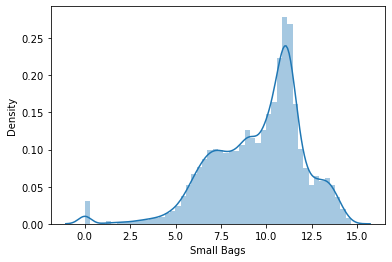

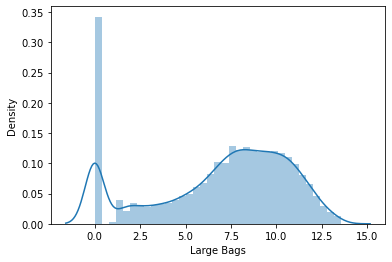

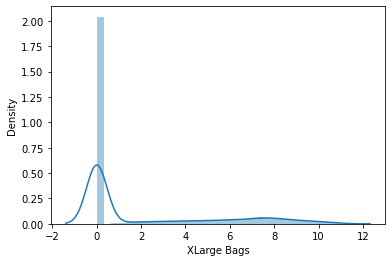

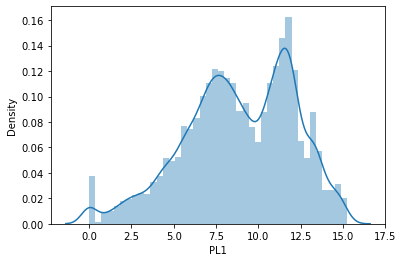

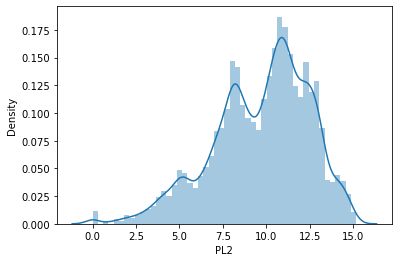

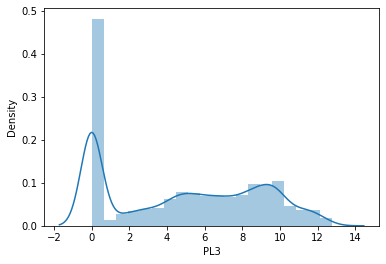

In [52]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

# Model Fitting and Selection

In [53]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
y=pd.DataFrame(data=y)

Lets Scale the data. Using Standard Scaler.

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)

In [55]:
sc_x

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,-0.061962,-0.473426,-0.215789,-0.648254,-0.627319,-1.210013,-1.695495,-0.587318,0.431565,-0.246207,-1.029537
1,-0.134302,-0.431908,-0.179590,-0.636520,-0.627319,-1.210013,-1.695495,-0.719464,0.359601,-0.199437,-1.029537
2,0.218235,-0.504018,-0.243116,-0.621646,-0.627319,-1.210013,-1.695495,-0.668997,0.683316,-0.001478,-1.029537
3,0.033021,-0.661685,-0.384129,-0.552915,-0.627319,-1.210013,-1.695495,-0.560308,0.532565,-0.145897,-1.029537
4,-0.167601,-0.632653,-0.362677,-0.449388,-0.627319,-1.210013,-1.695495,-0.616931,0.353051,-0.135308,1.062882
...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.670586,-0.268139,-0.046548,-0.241763,-0.627319,1.980756,1.747054,-0.378245,-0.861693,-1.215018,-0.730620
17647,-0.765474,-0.443885,-0.200255,-0.317520,-0.627319,1.980756,1.747054,-0.544515,-0.569192,-1.215018,-0.431703
17648,-0.769503,-0.437415,-0.182019,-0.855591,-0.627319,1.980756,1.747054,-0.544458,-0.690718,0.424488,-0.431703
17649,-0.694596,-0.365019,-0.119253,-0.812010,-0.627319,1.980756,1.747054,-0.468195,-0.620126,0.424171,-0.431703


In [56]:
x=sc_x
x

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,-0.061962,-0.473426,-0.215789,-0.648254,-0.627319,-1.210013,-1.695495,-0.587318,0.431565,-0.246207,-1.029537
1,-0.134302,-0.431908,-0.179590,-0.636520,-0.627319,-1.210013,-1.695495,-0.719464,0.359601,-0.199437,-1.029537
2,0.218235,-0.504018,-0.243116,-0.621646,-0.627319,-1.210013,-1.695495,-0.668997,0.683316,-0.001478,-1.029537
3,0.033021,-0.661685,-0.384129,-0.552915,-0.627319,-1.210013,-1.695495,-0.560308,0.532565,-0.145897,-1.029537
4,-0.167601,-0.632653,-0.362677,-0.449388,-0.627319,-1.210013,-1.695495,-0.616931,0.353051,-0.135308,1.062882
...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.670586,-0.268139,-0.046548,-0.241763,-0.627319,1.980756,1.747054,-0.378245,-0.861693,-1.215018,-0.730620
17647,-0.765474,-0.443885,-0.200255,-0.317520,-0.627319,1.980756,1.747054,-0.544515,-0.569192,-1.215018,-0.431703
17648,-0.769503,-0.437415,-0.182019,-0.855591,-0.627319,1.980756,1.747054,-0.544458,-0.690718,0.424488,-0.431703
17649,-0.694596,-0.365019,-0.119253,-0.812010,-0.627319,1.980756,1.747054,-0.468195,-0.620126,0.424171,-0.431703


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will use Linear regression model to check for the best random state to fit our training and test data

In [58]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.4637177543184906
At random state 0,the testing accuracy is: 0.4612915304404469


At random state 1,the training accuracy is: 0.46164879613027066
At random state 1,the testing accuracy is: 0.4695895748192175


At random state 2,the training accuracy is: 0.46731767954128645
At random state 2,the testing accuracy is: 0.4468171517102444


At random state 3,the training accuracy is: 0.4615270017315871
At random state 3,the testing accuracy is: 0.47023970213015953


At random state 4,the training accuracy is: 0.4620344852430529
At random state 4,the testing accuracy is: 0.46835218381457766


At random state 5,the training accuracy is: 0.45819221588197967
At random state 5,the testing accuracy is: 0.48276932801164507


At random state 6,the training accuracy is: 0.45950623842633287
At random state 6,the testing accuracy is: 0.4778263015445495


At random state 7,the training accuracy is: 0.46331161723057035
At random state 7,the testing accuracy i

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)

In [60]:
x_train

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
16869,1.288210,1.625996,1.519778,1.325850,-0.210616,0.917166,1.617146,0.856473,1.069541,0.828673,-0.132786
5912,0.338238,0.431111,0.554067,0.252927,-0.627319,0.917166,-1.045957,0.699784,0.127179,0.605939,0.465048
3981,1.096561,1.043080,0.493248,1.357452,-0.627319,-0.146424,-0.136605,1.243761,0.857027,0.079427,0.465048
7836,0.234915,0.538408,0.558430,0.746831,0.744271,0.917166,1.357331,0.317706,0.170192,0.346278,-0.730620
12856,-1.566883,-1.090184,-0.988014,-0.006892,-0.627319,-0.146424,0.058256,-1.289853,-3.516699,-1.215018,1.062882
...,...,...,...,...,...,...,...,...,...,...,...
4832,0.925076,0.962628,1.009350,0.619530,0.986456,-0.146424,0.967609,1.008904,0.830835,1.123815,1.660716
7832,0.109044,0.328415,0.483883,-1.232674,-0.065093,0.917166,1.357331,0.332314,0.136769,-0.446080,0.465048
9509,-1.496715,-1.037950,-0.702562,-1.225923,-0.627319,-1.210013,-0.656235,-1.443265,-1.700455,-0.491858,-1.328454
8799,-0.704690,-1.008359,-0.675367,-1.860427,-0.627319,-1.210013,-1.565588,0.049317,-0.513802,0.467474,-1.627372


In [61]:
x_test

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
10308,-1.589156,-1.853381,-1.408247,-1.860427,-0.627319,-1.210013,0.318071,-0.422136,-1.907491,-1.215018,-1.627372
8112,0.163872,0.095965,0.140109,0.557860,0.492442,1.980756,-1.500634,0.692857,-0.769733,0.985795,-0.431703
671,1.101247,0.860441,0.674599,1.128348,0.236545,-1.210013,-0.916050,0.946342,1.234815,0.861624,-0.431703
17290,-1.270756,-0.910435,-0.763216,0.026976,-0.627319,1.980756,-0.201559,-2.228213,-0.947157,-1.215018,-0.431703
10098,-1.509716,-1.092315,-0.748181,-1.860427,-0.627319,-1.210013,0.058256,-0.917604,-1.911294,-1.215018,-1.627372
...,...,...,...,...,...,...,...,...,...,...,...
10591,-1.176376,-1.029486,-0.776034,-0.210081,-0.627319,-1.210013,0.707794,-1.383209,-0.722083,0.417453,1.062882
12988,0.236527,0.628458,0.669621,0.712214,-0.627319,-0.146424,0.188164,-0.092226,0.130648,0.681054,0.763965
2785,0.817490,0.951776,0.815706,1.128585,1.128724,-0.146424,-1.630541,0.988901,0.557455,0.001250,1.660716
3205,0.615204,0.796698,0.228804,1.214696,1.911092,-0.146424,-1.110911,-0.077634,0.763206,0.987117,-0.132786


In [62]:
y_train

,AveragePrice
17467,1.76
6186,1.26
4097,0.88
8151,0.75
13341,1.48
...,...
4956,1.06
8147,1.09
9976,1.70
9266,1.64


In [63]:
y_test

,AveragePrice
10775,1.89
8522,1.12
673,0.99
17888,1.38
10565,1.56
...,...
11058,1.65
13474,1.78
2873,1.26
3299,1.05


SupportVectorRegression model

In [64]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.4597364636188289
0.5817213591108499
0.7573526091052729


Various model and checking the accuracy

In [65]:
sv=SVR(kernel='rbf')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()

model=[lr,sv,dt,rf,kn,ab]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean())
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,0.463030,0.464038,0.078956,0.462497
1,SupportVector,0.757353,0.740535,0.038224,0.738445
2,DecisionTree,1.000000,0.724623,0.040568,0.733369
3,RandomForest,0.982320,0.878525,0.017895,0.875279
4,KNN,0.890970,0.811452,0.027776,0.819195
5,AdaBoost,0.501786,0.497570,0.074016,0.484699


We can say that Random Forest Regressor has performed well with test score of 87.96% and CV score of 87.51%. 
KNN has also performed well with 81.11% test accuracy and CV score of 81.91%

# Normalization and HyperTuning

Using Lasso for Normalization

Lets check the best parameters for Lasso

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [68]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.4639486575934152

Checking cross validation score for Lasso

In [69]:
cv_score=cross_val_score(ls,x,y,cv=kf)
cv_mean=cv_score.mean()
cv_mean

0.46250960371134797

We will select RandomForest and KNN as our model and Hypertune it to se if there is increase in any accuracy

In [73]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50]}

In [78]:
Finalmod=RandomForestRegressor(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=2,n_estimators=50)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=r2_score(y_test,pred)
MSE = mean_squared_error(y_test,pred_test)
cvs_score=cross_val_score(Finalmod,x,y,cv=kf)

print('Accuracy Score of RandomForest is',acc*100)
print('Mean Square Error is',MSE)
print('Cross Vaidation Score is', cvs_score.mean()*100)

Accuracy Score of RandomForest is 87.1396616340376
Mean Square Error is 0.07401623394093589
Cross Vaidation Score is 86.82746701697978


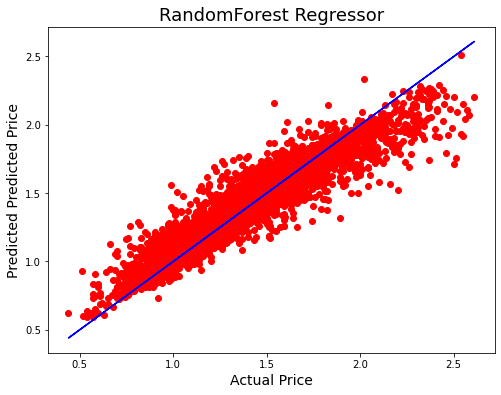

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Predicted Price',fontsize=14)
plt.title('RandomForest Regressor',fontsize=18)
plt.show()


The model is performing with 87% accuracy. Hence we can say that we can predict 87% of the Avocado prices correctly.

Lets create our object file for the final model

In [82]:
import joblib
joblib.dump(Finalmod,'Avocado_price_prediction.obj')

['Avocado_price_prediction.obj']